In [1]:
# !pip install opencv-python

In [17]:
# path = '/content/drive/My Drive/kd1_ml/cnn/cnn_mnist' # Colab
path = '.' # Local

In [18]:
# %autosave 0
import warnings
warnings.filterwarnings(action='ignore')

import cv2
import os
import numpy as np
from PIL import Image

from tensorflow.keras.models import load_model  # model 사용

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline

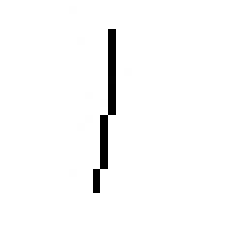

In [19]:
# 테스트 이미지 2.jpg 읽기
image = cv2.imread(path + '/1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray")  # 이미지 출력
plt.axis("off") # 축을 출력하지 말것
plt.show()      # 이미지 출력

In [20]:
x_test = []
x_test.append(image)

y_test = 1  # Target 1을 예측하는 경우

In [21]:
x_test_array = np.array(x_test)
# 3차원 배열, 1면 28행 28열
print('입력 이미지 데이터 shape: ', x_test_array.shape)

입력 이미지 데이터 shape:  (1, 28, 28)


In [22]:
print('이미지가 배열로 변환된 데이터(0: 검은색, 255: 흰색)')
# mnist: 흰색 0, opencv: 흰색 255 색상 체계를 통일시킬 필요가 있음
print(x_test_array) 

이미지가 배열로 변환된 데이터(0: 검은색, 255: 흰색)
[[[255 255 255 255 255 255 255 255 254 255 255 255 255 255 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 254 255 255 255   0 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255
   255 255 255 255 255 255 255 255 255 255 255]
  [255 255 255

In [23]:
print('이미지가 배열로 변환된 데이터(0: 흰색, 255: 검은색)')
print(255-x_test_array) # 0: 흰색, 255: 검은색
x_test_array = 255-x_test_array

이미지가 배열로 변환된 데이터(0: 흰색, 255: 검은색)
[[[  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   1   0   0   0 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0

In [24]:
print('대응하는 숫자', y_test)

대응하는 숫자 1


In [25]:
# CNN은 내부적으로 4차원의 데이터를 학습함으로 4차원으로 변경함: 면, 행, 열, 색상(1: 흑백, 3: 칼라)
x_test_array = x_test_array.reshape(1, 28, 28, 1).astype('float32') / 255.0
print('입력 이미지 데이터 shape: ', x_test_array.shape)  # 3차원 배열, 1면 28행 28열 -->  4차원 배열, 1면 28행 28열 흑백 1

입력 이미지 데이터 shape:  (1, 28, 28, 1)


In [26]:
# Google Drive에서 다운받은 파일로 확장자는 보통 h5 또는 hdf5 이며 어떤 확장자든 상관 없음.
# model = load_model(path + '/Mnist3_cnn.h5')
model = load_model(path + '/Mnist3_cnn_colab_2022.h5') # Colab GPU

In [27]:
yhat_test = model.predict(x_test_array, batch_size=1)
print(yhat_test.shape)
print(yhat_test)

(1, 10)
[[2.3883642e-04 9.0950853e-01 1.1562330e-03 2.9023264e-05 1.5661575e-02
  3.9071427e-04 7.1216308e-02 3.4446444e-04 1.2715921e-03 1.8269697e-04]]


In [28]:
idx = np.argmax(yhat_test)  # 최대값의 index
print(idx)  # 최대값이 있는 index 산출
print('실제: {0:.0f}, 예상: {1:.0f}, 확률: {2:.1f}%'.format(y_test, idx, yhat_test[0][idx]*100))

1
실제: 1, 예상: 1, 확률: 91.0%


In [29]:
def test(fname, y_test):
    image = cv2.imread(path + fname, cv2.IMREAD_GRAYSCALE)
    x_test = []
    x_test.append(image)
    x_test_array = np.array(x_test)
    x_test_array = 255-x_test_array
    x_test_array = x_test_array.reshape(1, 28, 28, 1).astype('float32') / 255.0
    yhat_test = model.predict(x_test_array, batch_size=1)
    idx = np.argmax(yhat_test)  # 최대값의 index

    idx = np.argmax(yhat_test)  # 최대값의 index
    print(idx)  # 최대값이 있는 index 산출
    print('실제: {0:.0f}, 예상: {1:.0f}, 확률: {2:.1f}%'.format(y_test, idx, yhat_test[0][idx]*100))


In [32]:
test('/1.jpg', 1)
test('/1_1.jpg', 1)

# 큰이미지 에러 발생 확인
# cannot reshape array of size 16384 into shape (1,28,28,1)
# test('/1_2.jpg', 1)  

test('/1_3.jpg', 1)
test('/1_4.jpg', 1)
test('/2.jpg', 2)
test('/3.jpg', 3)
test('/7.jpg', 7)

1
실제: 1, 예상: 1, 확률: 91.0%
1
실제: 1, 예상: 1, 확률: 100.0%
1
실제: 1, 예상: 1, 확률: 71.6%
1
실제: 1, 예상: 1, 확률: 100.0%
2
실제: 2, 예상: 2, 확률: 100.0%
3
실제: 3, 예상: 3, 확률: 100.0%
7
실제: 7, 예상: 7, 확률: 92.4%
